## Basic Setup

In [110]:
## Initialization
rm(list=ls())

training_data = '../data/house_price_training_data.txt'
prediction_data = '../data/house_price_predict.txt'

sources <- c("featureNormalize.R", 
			  "computeCostMulti.R",
			 "gradientDescentMulti.R",
			 "normalEqn.R",
			 "pinv.R")

for (i in 1:length(sources)) {
  source(sources[i])
  cat(paste("Loaded ",sources[i],"\n"))
}

## ---------------- Part 1: Feature Normalization ----------------
cat('Loading data ...\n')
## Load Data
data <-
  read.table(training_data, sep = ',')
ncols = ncol(data)
X <- data[, 1:ncols-1]
y <- data[, ncols]
m <- length(y)


# Print out some data points
cat('First 10 examples from the dataset: \n')
temp <- cbind("X = [",X[1:10,], "], y =", y[1:10])
names(temp) <- NULL
print(temp)

Loaded  featureNormalize.R 
Loaded  computeCostMulti.R 
Loaded  gradientDescentMulti.R 
Loaded  normalEqn.R 
Loaded  pinv.R 
Loading data ...
First 10 examples from the dataset: 
                             
1  X = [ 2104 3 ], y = 399900
2  X = [ 1600 3 ], y = 329900
3  X = [ 2400 3 ], y = 369000
4  X = [ 1416 2 ], y = 232000
5  X = [ 3000 4 ], y = 539900
6  X = [ 1985 4 ], y = 299900
7  X = [ 1534 3 ], y = 314900
8  X = [ 1427 3 ], y = 198999
9  X = [ 1380 3 ], y = 212000
10 X = [ 1494 3 ], y = 242500


## Scale features and set them to zero mean - Normalize Features

In [111]:
# Scale features and set them to zero mean
fN <- featureNormalize(X)
X <- fN$X_norm
mu <- fN$mu
sigma <- fN$sigma

# Add intercept term to X
X <- cbind(rep(1,m),X)
X <- as.matrix(X)

## Gradient Descent

In [112]:
# Choose some alpha value
alpha <- 1 # modified from 0.01 
num_iters <- 50 #modified from 100 

# Init Theta and Run Gradient Descent
theta <- rep(0,ncols)
# Here we can test different learning parameter alpha
gDM <- gradientDescentMulti(X, y, theta, alpha , num_iters)
theta <- gDM$theta
J_history <- gDM$J_history
rm(gDM)

## Plot the convergence graph - Gradient Descent

Theta computed from gradient descent: 
[1] 340412.660 110631.050  -6649.474


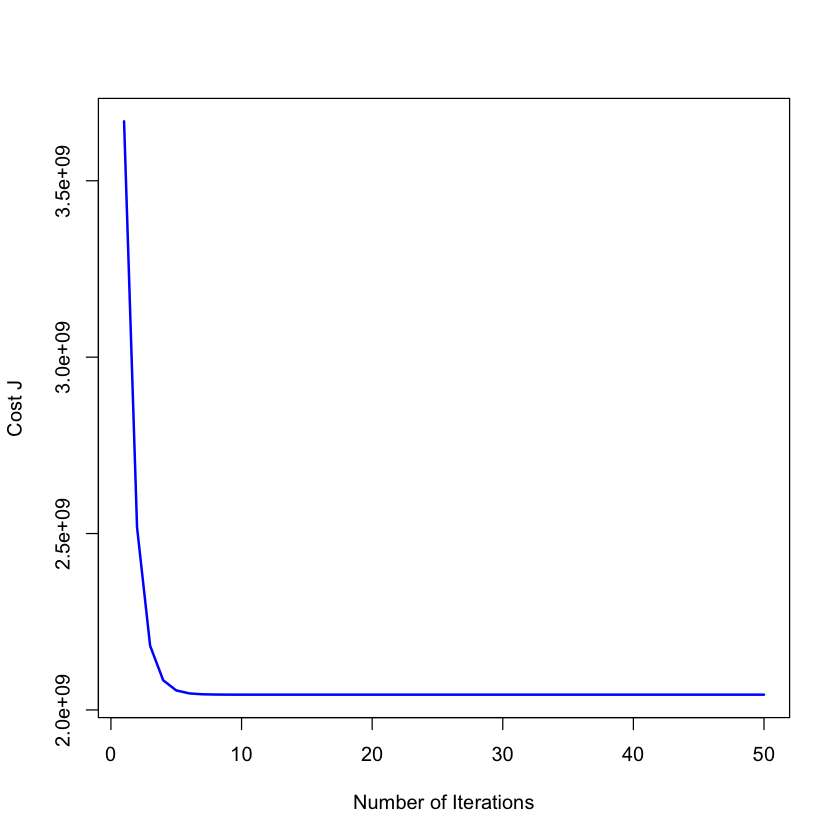

In [113]:
# Plot the convergence graph
plot(1:length(J_history), J_history, type="l", col="blue", lwd=2, cex=.1,
     xlab="Number of Iterations", ylab="Cost J")

# Display gradient descent's result
cat('Theta computed from gradient descent: \n')
print(theta)

## Predict price of a 1650 sq-ft, 3 br house - Gradient Descent

In [114]:
# Estimate the price of a 1650 sq-ft, 3 br house
# Recall that the first column of X is all-ones. Thus, it does
# not need to be normalized.

prediction_data <- read.table(prediction_data, sep = ',')
price <- data.matrix(prediction_data) %*% theta
cat(sprintf('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n $%f\n', price))

#price <- cbind(1, (1650-mu[1])/sigma[1], (3-mu[2])/sigma[2]) %*% theta
#price

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $182861697.196800


## Solving with normal equations

In [115]:
cat('Solving with normal equations...\n')
## Load Data
data <- read.table(training_data,sep =',')
ncols = ncol(data)
X <- data[, 1:ncols-1]
y <- data[, ncols]
m <- length(y)

# Add intercept term to X
X <- cbind(rep(1,m),X)
X <- as.matrix(X)
# Calculate the parameters from the normal equation
theta <- normalEqn(X, y)

# Display normal equation's result
cat('Theta computed from the normal equations: \n')
print(theta)

Solving with normal equations...
Theta computed from the normal equations: 
           [,1]
[1,] 89597.9095
[2,]   139.2107
[3,] -8738.0191


## Predict price of a 1650 sq-ft, 3 br house - Normal Equation

In [125]:
price <- data.matrix(prediction_data) %*% theta
cat(sprintf('Predicted price of a 1650 sq-ft, 3 br house (using normal equations):\n $%f\n', price))

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 $293081.464335
